Import packages

In [3]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
%matplotlib inline

Set working directory

In [4]:
os.chdir('/Users/ahnate/Files/DataScience/RecordUnionFraudDetection/working')

Define function for importing data

In [5]:
def import_dat(input):
    dat = open(input, "r").read()
    # need to replace new lines with commas and format as list for json.loads
    dat = json.loads("[" + dat.replace("}\n{", "},\n{") + "]")
    # convert from json to dataframe
    dat = pd.DataFrame.from_dict(dat, orient='columns')
    return dat

Import data

In [6]:
tracks = import_dat("../input/tracks-2017-09-09")
users = import_dat("../input/users-2017-09-09")
streams = import_dat("../input/streams-2017-09-09-allcountries")

## Look at the data and do some preprocessing
### Tracks

In [7]:
tracks.head()

,album_artist,album_code,album_name,track_id,track_name
0,Tasia Rojas,ece406c1937c4123e6b935f39898770dcaa0382c,Salmon Addition,fe2f34b55827b9721aa503d1dc9f3bca951859de,Doubtful Anteater
1,Gertrude Faulkner,bb94c41eade59eeec79b04aa141c99344528d09f,Newfoundland Quilt,2432c3346fc867e9026174ea73ab787a7fdeaa1f,Heartbreaking Louse
2,Ora Corcoran,0db473f623b01b0134f8178512f91e5ac60cb2af,Havanese Push,cb5e2409dfa5c9c8ccabdca2afeb6e84eca9a435,Watery Tortoise
3,Shanika Wing,4aadb443b1d8cc4c84a6ca1dd348c599396c7c17,Puma Hate,2998e8ecabbf9d220dc22c516740f7982b2353e8,Nutritious Ox
4,Lonnie Hope,a2b64056f39d60b0de18550d43a37b64b1f63dec,Kingfisher Garden,fb581ad122d260941757c5a2b1ed1a42108d632f,Foregoing Umbrellabird


### Users

In [8]:
users.head()

,access,birth_year,country,gender,user_id
0,free,1989,8,female,093449f2282b4e4793948bbc3e9f1fd7278c0c49
1,premium,2001,4,female,3e9603e5ab69c5cfe14dcc1954c46cd849940b24
2,premium,1988,52,female,c12f6f2784787619d91f61cf215480b70d47f36e
3,premium,1995,16,female,d55e6dc8e7fdd87d42b639ed27ca95795738308b
4,premium,1996,44,female,6b1867e55d95cd39f0b3eac38518fd11572e732f


In [9]:
users.dtypes

access        object
birth_year    object
country        int64
gender        object
user_id       object
dtype: object

In [10]:
# set birth_year to numeric and country to categorical
users['birth_year'] = pd.to_numeric(users['birth_year'], errors='coerce')
users['country'] = users['country'].astype(object)

In [11]:
# create age column
users['age'] = 2017 - users['birth_year']

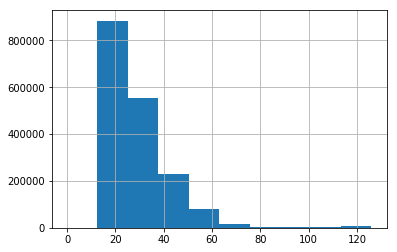

In [12]:
users['age'].hist()

### Streams

In [13]:
streams.head()

,device_type,length,os,timestamp,track_id,user_id
0,mobile,136,iOS,1504923300000,c43ac11b86c603e40aad9a0fbe72d192c0c51ded,3db57275059923d98119850a6233d3c609a171a5
1,desktop,60,Browser,1504951200000,eee087bddc7db49cde2d43df7a04f3975dff4a78,0495eb11e3ca80c0289d3a08b5c60f0227e12314
2,mobile,191,iOS,1504944900000,45e8fe7c02519b99b9284717cd3488eab2ef798e,b3d9fb538674878162e5a93566195daf878723db
3,desktop,268,other,1504980900000,eb1016ee12dc5a3ada044b7dacb716049ed121c8,4831658d8f436e8c6ecf29984c405521de26e654
4,mobile,212,Android,1504916100000,863af142e7604488cfd8f2245b65c9e6cafcd201,e1a1bb65848f54f266273caad9a327d13397889f


In [14]:
# Convert from milliseconds to seconds
streams['timestamp'] = streams['timestamp']/1000.0
# Convert from UNIX epoch to date time format
streams['timestamp'] = streams['timestamp'].apply(datetime.datetime.fromtimestamp)
streams['timestamp'].head()

0   2017-09-09 07:45:00
1   2017-09-09 15:30:00
2   2017-09-09 13:45:00
3   2017-09-09 23:45:00
4   2017-09-09 05:45:00
Name: timestamp, dtype: datetime64[ns]

## Merge data into a single dataframe and explore

In [15]:
dat = pd.merge(streams, tracks, how='left', on='track_id')
dat = pd.merge(dat, users, how='left', on='user_id')

Define label encoder function

In [16]:
def lab_encode(input):
    le = preprocessing.LabelEncoder()
    le.fit(input)
    return le.transform(input).astype(object)

Encode hashed columns with numerical labels

In [17]:
dat['track_id'] = lab_encode(dat['track_id'])
dat['user_id'] = lab_encode(dat['user_id'])
dat['album_code'] = lab_encode(dat['album_code'])
dat.head()

,device_type,length,os,timestamp,track_id,user_id,album_artist,album_code,album_name,track_name,access,birth_year,country,gender,age
0,mobile,136,iOS,2017-09-09 07:45:00,64035,430695,Cliff Creech,11420,Binturong Brothers,Bright Antelope,free,1956.0,59,male,61.0
1,desktop,60,Browser,2017-09-09 15:30:00,77961,31824,Ginette Rowley,2927,Llama Wing,Nice Jellyfish,free,1978.0,43,male,39.0
2,mobile,191,iOS,2017-09-09 13:45:00,22853,1256198,Cyrus Ramey,6869,Caterpillar Doctor,Habitual Starling,premium,2001.0,16,female,16.0
3,desktop,268,other,2017-09-09 23:45:00,76755,504157,Yee Hahn,16976,Stork Spoon,Woebegone Markhor,premium,1959.0,43,male,58.0
4,mobile,212,Android,2017-09-09 05:45:00,43741,1575733,Arnita Reaves,21357,Falcon Line,Irate Birman,premium,1996.0,59,female,21.0


In [18]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4313582 entries, 0 to 4313581
Data columns (total 15 columns):
device_type     object
length          int64
os              object
timestamp       datetime64[ns]
track_id        object
user_id         object
album_artist    object
album_code      object
album_name      object
track_name      object
access          object
birth_year      float64
country         object
gender          object
age             float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(11)
memory usage: 526.6+ MB


Descriptives for numerical variables

In [19]:
dat.describe()

,length,birth_year,age
count,4.313582e+06,4.300096e+06,4.300096e+06
mean,1.727955e+02,1.986484e+03,3.051627e+01
std,8.864851e+01,1.367262e+01,1.367262e+01
min,3.000000e+01,1.891000e+03,0.000000e+00
25%,1.160000e+02,1.981000e+03,2.100000e+01
50%,1.720000e+02,1.990000e+03,2.700000e+01
75%,2.160000e+02,1.996000e+03,3.600000e+01
max,9.000000e+02,2.017000e+03,1.260000e+02


Look at counts and unique values

In [20]:
dat[:].astype('object').describe()

,device_type,length,os,timestamp,track_id,user_id,album_artist,album_code,album_name,track_name,access,birth_year,country,gender,age
count,4313582,4313582,4313582,4313582,4313582,4313582,4313582,4313582,4313582,4313582,4313582,4300096.0,4313582,4313582,4300096.0
unique,3,870,8,96,83426,1787756,16915,24913,23201,70979,3,120.0,61,3,120.0
top,mobile,157,iOS,2017-09-09 22:30:00,67499,961141,Malcolm Crook,18722,Hedgehog Stone,Literate Frigatebird,premium,1990.0,52,male,27.0
freq,2419128,199937,1672335,66642,232564,3310,636055,232564,232564,232564,3111035,231232.0,1047328,2487230,231232.0


### Histograms

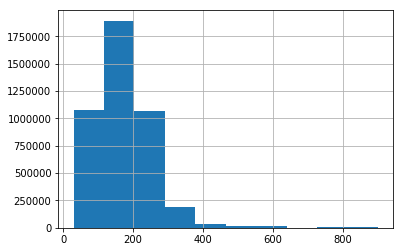

In [21]:
dat['length'].hist()

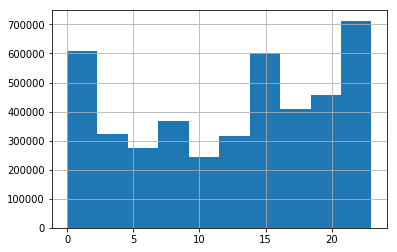

In [22]:
dat['timestamp'].dt.hour.hist()

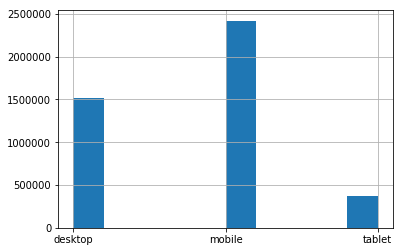

In [23]:
dat['device_type'].hist()

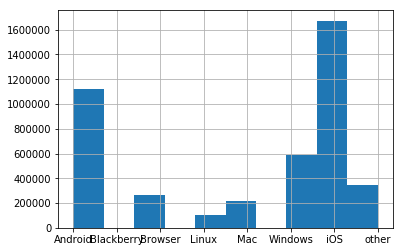

In [24]:
dat['os'].hist()

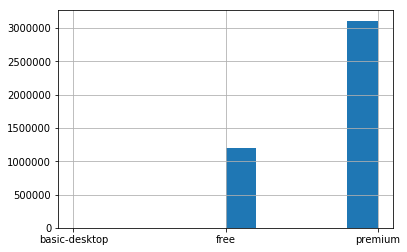

In [25]:
dat['access'].hist()

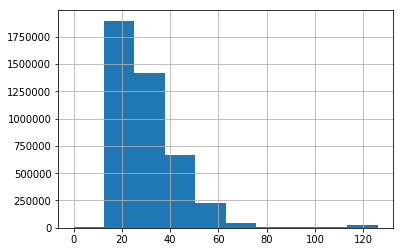

In [26]:
dat['age'].hist()

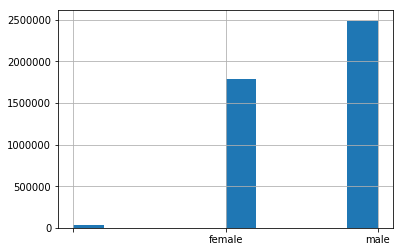

In [27]:
dat['gender'].hist()

### Factors that could predict streaming fraud

<ul>
    <li>Same user_id (or several user_ids) with some type of consistently non-normal listening behavior.</li>
    <li>Make clusters of different types of user_ids behavior</li>
    <li>Find the user_ids that have "non-normal" or atypical behavior</li>
</ul>

### "Non-normal" or atypical user behavior

<ul>
    <li>Listening to very narrow range of artists</li>
    <li>Listening to tracks in a manner that's too uniform</li>
    <li>Look at length variable</li>
    <li>Look at time stamp</li>
</ul>

### Flag user_id outliers

<ul>
    <li>By age</li>
    <li>By country</li>
</ul>

### Aggregates
<ul>
    <li>Run aggregate stats by user_ids.</li>
    <li>Do some kind of clustering analysis based on user_id stats.</li>
    <li>Compute range for each user_id</li>
    <li>Range of length and time_stamp for each user_id</li>
    <li>Repeated track_id for each user_id (unusually large repeats)</li>
    <li>Repeated album artist and album code for each user_id (lack of variety might be indication)</li>
    <li>Repeated album artist and album code for each user_id (unusually large repeats)</li>
</ul>

In [95]:
dat["length"][dat["user_id"] == 961141].nunique()

2

## Feature engineering: create aggregate statistics grouped by user_id

Calculate number of unique tracks listened to by each user_id as well.

Then look at the ratio of unique tracks over total tracks. (same thing for album)

In [96]:
datByUser = dat.groupby('user_id').agg({'timestamp':["count", lambda x: max(x) - min(x)],
                            'length': ["nunique", sum, min, max, lambda x: max(x) - min(x)],
                            'track_id': "nunique",
                            'album_code': "nunique",
                            'device_type': "first",
                            'os': "first",
                            'access': "first",
                            'country': "first",
                            'gender': "first",
                            'age': "first"
                           })
# Drop one level of column index
datByUser.columns = datByUser.columns.droplevel(level=0)
# Rename columns
datByUser.columns = ["time.n", "time.range", "len.nuniq", "len.sum", "len.min", "len.max", "len.range",
                    "track.nuniq", "album.nuniq", "dev_type", "os", "access", "country", "gender", "age"                     
                    ]
datByUser.head()

,time.n,time.range,len.nuniq,len.sum,len.min,len.max,len.range,track.nuniq,album.nuniq,dev_type,os,access,birth_year,country,gender,age
user_id,,,,,,,,,,,,,,,,
0,1,00:00:00,1,191,191,191,0,1,1,desktop,Mac,premium,1993.0,15,male,24.0
1,1,00:00:00,1,177,177,177,0,1,1,mobile,iOS,premium,1994.0,43,male,23.0
2,1,00:00:00,1,165,165,165,0,1,1,mobile,Android,premium,1988.0,15,male,29.0
3,2,00:15:00,2,642,184,458,274,1,1,desktop,other,free,1986.0,40,male,31.0
4,2,01:00:00,2,424,165,259,94,2,2,desktop,Windows,premium,1990.0,43,female,27.0


# Notes on the significance of each of the above columns
<ul>
    <li>time.n: number of different timestamps upon which streams were initiated. Larger number here could indicate a bot.</li>
    <li>time.range: range of time between which all the streams were initiated. A really large range could indicate a bot as well, if they were actively playing tracks all day, for example.</li>
    <li>len.min, max, range: Length of listening time would probably vary according to track, but if there was a uniform listening time for every track, this could be an obvious giveaway that it's a bot too. This could be manifested in a small or 0 len.range, while having a high time.n value, for example</li>
    <li>track.range and album.range: large numbers don't really indicate anything here, but a small value (maybe 0) with high track count could indicate a bot that's only listening to a track or album to up the play count.</li>
    <li>dev_type to age columns: These columns are probably less predictive of fraud since customers could put anything they want (unless things like age and country are actually verified. Access, os, and dev_type might provide some level of correlation with fraud behavior, but probably won't be highly predictive by themselves.</li>
</ul>


### First let's compute a reasonable streaming rate per day:
Assuming an active listening window (maximum) of 12 hours (43200s) per day, how many songs would a human user stream on average per day?

We'll say the average song length is: 230s
https://www.statcrunch.com/5.0/viewreport.php?groupid=948&reportid=28647

Non-stop listening within a 12hr window would be about 43200/230 = 188 songs.

(For reference, there's 86400s in 24hours)

So let's start by looking at the data for all user_ids that are streaming more than 200 songs per day.



### datByUser high track volume histogram

Let's look at an obvious example of fraudster. We'll take the user_id with the highest count of tracks (time.n)

In [97]:
datByUser["time.n"].max()

3310

In [98]:
datByUser[datByUser["time.n"] == 3310]

,time.n,time.range,len.nuniq,len.sum,len.min,len.max,len.range,track.nuniq,album.nuniq,dev_type,os,access,birth_year,country,gender,age
user_id,,,,,,,,,,,,,,,,
961141,3310,0 days,2,196945,55,60,5,10,1,tablet,iOS,premium,1982.0,8,female,35.0


So this is a pretty clear example of a bot user_id. They listened to 3310 tracks in 24 hours, listened to only 1 album, and only listened for either 55 or 60 seconds. We can verify here:

In [99]:
dat[dat["user_id"] == 961141].head(6)

,device_type,length,os,timestamp,track_id,user_id,album_artist,album_code,album_name,track_name,access,birth_year,country,gender,age
409,tablet,60,iOS,2017-09-09 09:45:00,154,961141,Tod Mcdowell,21908,Lynx Afternoon,Guarded Shark,premium,1982.0,8,female,35.0
673,tablet,55,iOS,2017-09-09 09:45:00,75482,961141,Tod Mcdowell,21908,Lynx Afternoon,Clear Deer,premium,1982.0,8,female,35.0
726,tablet,60,iOS,2017-09-09 09:45:00,12399,961141,Tod Mcdowell,21908,Lynx Afternoon,Purple Zorse,premium,1982.0,8,female,35.0
3040,tablet,60,iOS,2017-09-09 09:45:00,63480,961141,Tod Mcdowell,21908,Lynx Afternoon,Zealous Pademelon,premium,1982.0,8,female,35.0
5275,tablet,55,iOS,2017-09-09 09:45:00,75482,961141,Tod Mcdowell,21908,Lynx Afternoon,Clear Deer,premium,1982.0,8,female,35.0
5288,tablet,55,iOS,2017-09-09 09:45:00,75482,961141,Tod Mcdowell,21908,Lynx Afternoon,Clear Deer,premium,1982.0,8,female,35.0


99.9% Quantile for number of songs

In [100]:
datByUser["time.n"].quantile(.999)

86.0

So only 0.1% of users are listening to more than 86 songs in a 24hr period

In [101]:
datByUser[datByUser["time.n"].ge(190)]

,time.n,time.range,len.nuniq,len.sum,len.min,len.max,len.range,track.nuniq,album.nuniq,dev_type,os,access,birth_year,country,gender,age
user_id,,,,,,,,,,,,,,,,
1085,341,06:00:00,6,20602,51,73,22,100,10,desktop,Browser,free,1981.0,22,male,36.0
2102,339,12:00:00,2,20317,37,60,23,5,1,mobile,iOS,premium,1988.0,59,male,29.0
3800,272,23:45:00,77,30759,43,191,148,260,43,desktop,Browser,premium,1990.0,59,male,27.0
4860,238,23:45:00,77,26395,64,192,128,207,41,desktop,Browser,premium,1990.0,59,male,27.0
5750,356,06:15:00,5,21395,53,73,20,99,10,desktop,Browser,free,1959.0,37,female,58.0
6138,455,15:45:00,2,27295,55,60,5,10,1,mobile,iOS,premium,1998.0,30,female,19.0
7097,260,04:30:00,6,15747,51,73,22,101,10,desktop,Browser,free,1961.0,52,male,56.0
7549,370,23:45:00,2,57339,144,155,11,1,1,desktop,other,premium,1987.0,59,female,30.0
8749,309,05:30:00,6,18687,51,73,22,100,10,desktop,Browser,free,1982.0,16,male,35.0


In [60]:
datByUser["time.n"][datByUser["time.n"].ge(180)].count()

939

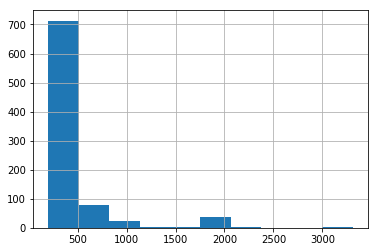

In [31]:
datByUser["time.n"][datByUser["time.n"].ge(200)].hist()

Note: not all users with high track counts are listening to these tracks in their entirety (there's a likely scenario that many might be "browsing", or going through tracks to find stuff they like). So high track count should at least be used in conjunction wiht total listening time.

Now let's look at all user_ids that are streaming more than 43200 seconds (12 hours) per day.

In [32]:
datByUser["len.sum"][datByUser["len.sum"].ge(43200)].count()

392

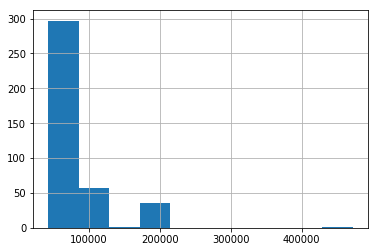

In [33]:
datByUser["len.sum"][datByUser["len.sum"].ge(43200)].hist()

Now let's zoom-in on these users and look at more specific aspects of their listening behavior.

So we'll create a subset of the data to include only these high bandwidth users.

In [87]:
datByUser["time.range"].astype('timedelta64[m]').astype('int').quantile(.90)

435.0

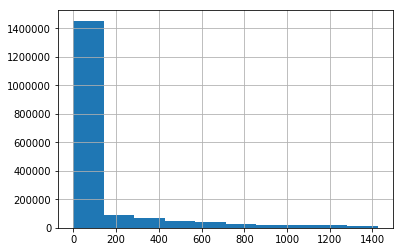

In [80]:
# histogram of the range (max-min) of listening, in hours
datByUser["time.range"].astype('timedelta64[m]').hist()

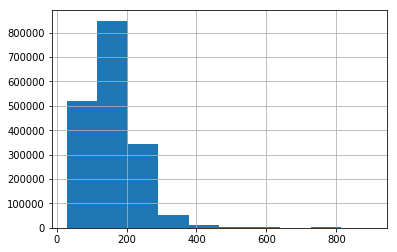

In [35]:
datByUser["len.min"].hist()

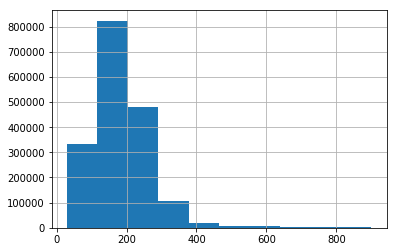

In [36]:
datByUser["len.max"].hist()

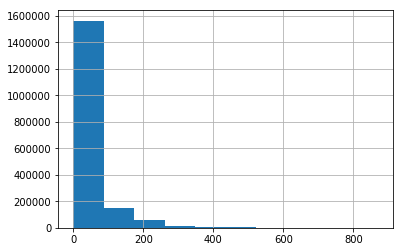

In [37]:
datByUser["len.range"].hist()

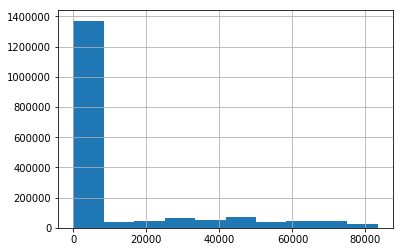

In [38]:
datByUser["track.range"].hist()

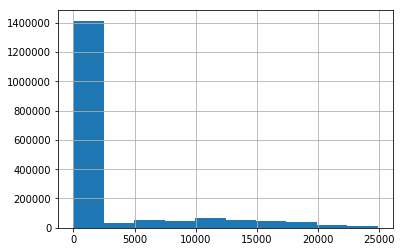

In [39]:
datByUser["album.range"].hist()

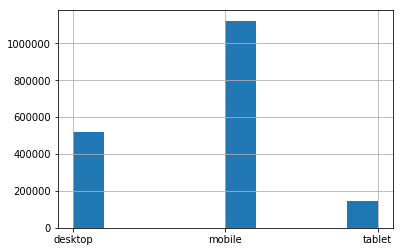

In [40]:
datByUser["dev_type"].hist()

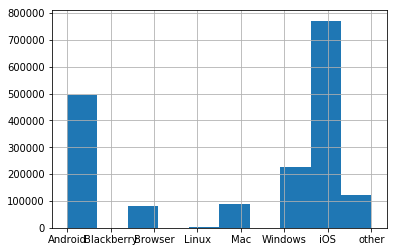

In [41]:
datByUser["os"].hist()

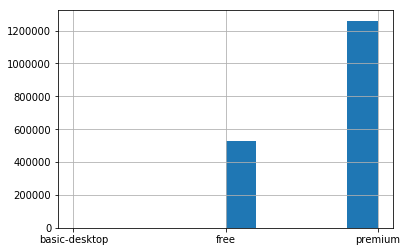

In [42]:
datByUser["access"].hist()

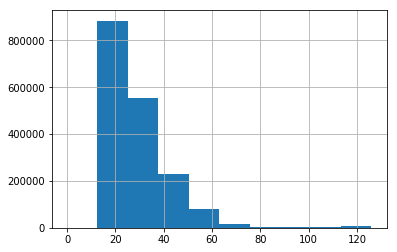

In [43]:
datByUser["age"].hist()

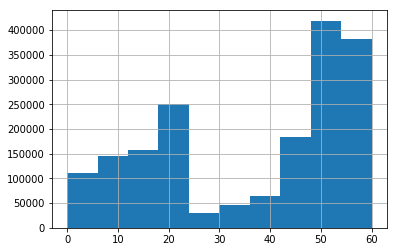

In [44]:
datByUser["country"].hist()

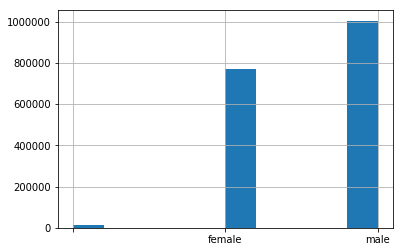

In [45]:
datByUser["gender"].hist()

Data is highly skewed so let's look at medians

## How to find fraud behavior

Look at number at tracks listened to in a day.

Visualize listening behavior for a user.

Find a really good criteria, and stick with it.


Calculation of various statistical parameters such as averages, quantiles, performance metrics, probability distributions, and so on. For example, the averages may include average length of call, average number of calls per month and average delays in bill payment.

Clustering and classification to find patterns and associations among groups of data.